<h1 style="font-size:3rem; color:green">Titanic</h1>

In [1]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

# Additional imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


In [2]:
def read_dataset():
    train = pd.read_csv('train.csv')
    print('Train data imported successfully!')
    test = pd.read_csv('test.csv')
    print('Test data imported successfully!')
    return train, test


In [3]:
train, test = read_dataset()

Train data imported successfully!
Test data imported successfully!


In [4]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Info of train data: ')
print(train.info())


Info of train data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Distribution of Missing Value')

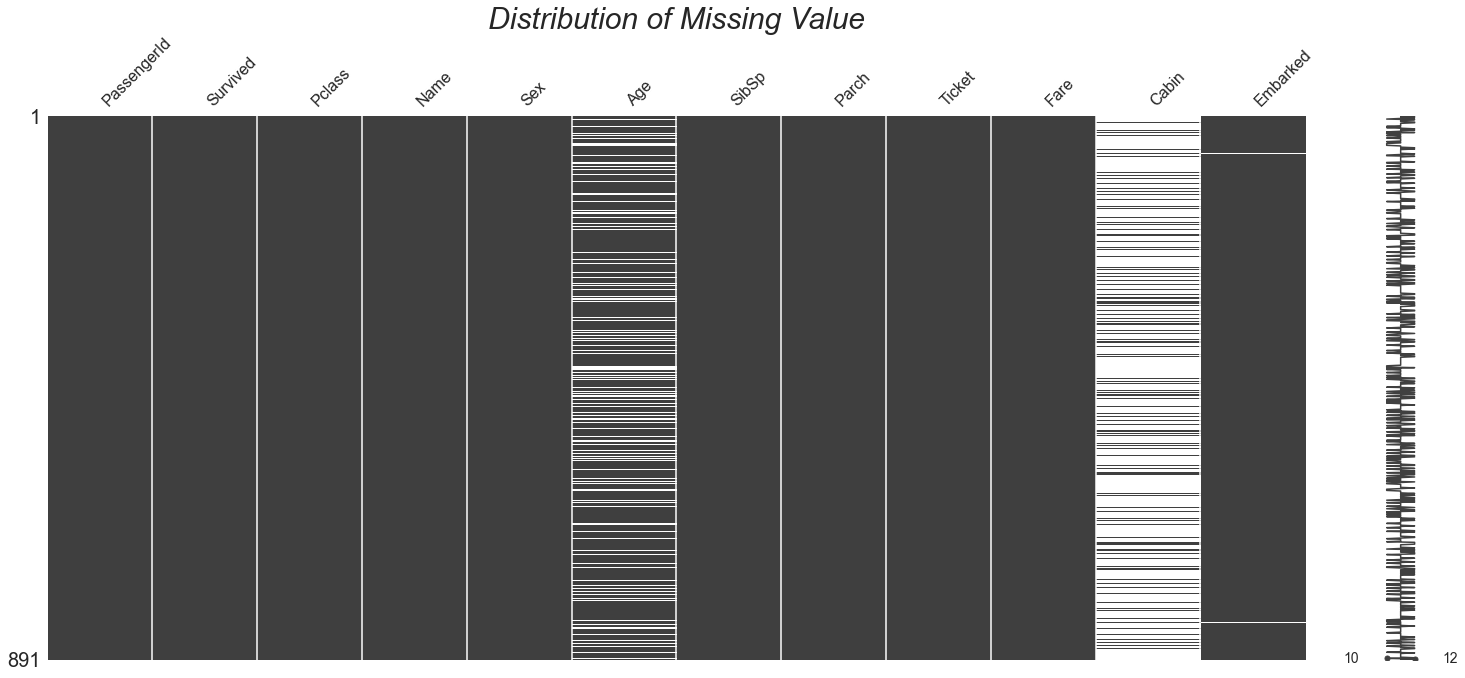

In [7]:
msno.matrix(train)
plt.title('Distribution of Missing Value', fontsize=30, fontstyle='oblique')


In [8]:
train.drop(["PassengerId", "Cabin", "Ticket", "Name"], inplace=True, axis=1)


In [9]:
train_inputs = train.drop('Survived', axis=1)
train_targets = train['Survived']


In [10]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()


In [11]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])


In [12]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])


In [13]:
train_inputs['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

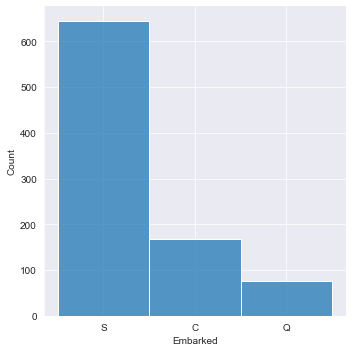

In [14]:
sns.displot(train['Embarked'])
plt.show()


In [15]:
train_inputs['Embarked'] = train_inputs['Embarked'].fillna('S')


In [16]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(train_inputs[categorical_cols])


In [17]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))


In [18]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])


In [19]:
train_inputs


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,male,22.000000,1.0,0.0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1.0,female,38.000000,1.0,0.0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,3.0,female,26.000000,0.0,0.0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1.0,female,35.000000,1.0,0.0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,3.0,male,35.000000,0.0,0.0,8.0500,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,male,27.000000,0.0,0.0,13.0000,S,0.0,1.0,0.0,0.0,1.0
887,1.0,female,19.000000,0.0,0.0,30.0000,S,1.0,0.0,0.0,0.0,1.0
888,3.0,female,29.699118,1.0,2.0,23.4500,S,1.0,0.0,0.0,0.0,1.0
889,1.0,male,26.000000,0.0,0.0,30.0000,C,0.0,1.0,1.0,0.0,0.0


In [20]:
gender = pd.get_dummies(train_inputs['Sex'], drop_first=True)
train_inputs['Gender'] = gender
train_inputs['Gender'] = train_inputs['Gender'].astype('float64')
train_inputs


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Gender
0,3.0,male,22.000000,1.0,0.0,7.2500,S,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,female,38.000000,1.0,0.0,71.2833,C,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,female,26.000000,0.0,0.0,7.9250,S,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,female,35.000000,1.0,0.0,53.1000,S,1.0,0.0,0.0,0.0,1.0,0.0
4,3.0,male,35.000000,0.0,0.0,8.0500,S,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,male,27.000000,0.0,0.0,13.0000,S,0.0,1.0,0.0,0.0,1.0,1.0
887,1.0,female,19.000000,0.0,0.0,30.0000,S,1.0,0.0,0.0,0.0,1.0,0.0
888,3.0,female,29.699118,1.0,2.0,23.4500,S,1.0,0.0,0.0,0.0,1.0,0.0
889,1.0,male,26.000000,0.0,0.0,30.0000,C,0.0,1.0,1.0,0.0,0.0,1.0


<h1 style="font-size:2rem; color:green">Label Encoder</h1>

In [21]:
label_encoder = preprocessing.LabelEncoder()
train_inputs['Embarked'] = label_encoder.fit_transform(train_inputs['Embarked'])
train_inputs['Embarked'] = train_inputs['Embarked'].astype('float64')
train_inputs


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Gender
0,3.0,male,22.000000,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,female,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,female,26.000000,0.0,0.0,7.9250,2.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,female,35.000000,1.0,0.0,53.1000,2.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3.0,male,35.000000,0.0,0.0,8.0500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,male,27.000000,0.0,0.0,13.0000,2.0,0.0,1.0,0.0,0.0,1.0,1.0
887,1.0,female,19.000000,0.0,0.0,30.0000,2.0,1.0,0.0,0.0,0.0,1.0,0.0
888,3.0,female,29.699118,1.0,2.0,23.4500,2.0,1.0,0.0,0.0,0.0,1.0,0.0
889,1.0,male,26.000000,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0,0.0,1.0


<h1 style="font-size:2rem; color:green">Drop the textual categorical columns</h1>

In [22]:
train_inputs.drop(['Sex'], inplace=True, axis=1)
train_inputs


,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Gender
0,3.0,22.000000,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,2.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,35.000000,1.0,0.0,53.1000,2.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3.0,35.000000,0.0,0.0,8.0500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,2.0,0.0,1.0,0.0,0.0,1.0,1.0
887,1.0,19.000000,0.0,0.0,30.0000,2.0,1.0,0.0,0.0,0.0,1.0,0.0
888,3.0,29.699118,1.0,2.0,23.4500,2.0,1.0,0.0,0.0,0.0,1.0,0.0
889,1.0,26.000000,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [23]:
train_inputs.dtypes


Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Embarked      float64
Sex_female    float64
Sex_male      float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
Gender        float64
dtype: object

In [24]:
train_inputs.isna().sum()


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Gender        0
dtype: int64

In [25]:
train_inputs.drop(['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'], inplace=True, axis=1)
train_inputs


,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3.0,22.000000,1.0,0.0,7.2500,2.0,1.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,2.0,0.0
3,1.0,35.000000,1.0,0.0,53.1000,2.0,0.0
4,3.0,35.000000,0.0,0.0,8.0500,2.0,1.0
...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,2.0,1.0
887,1.0,19.000000,0.0,0.0,30.0000,2.0,0.0
888,3.0,29.699118,1.0,2.0,23.4500,2.0,0.0
889,1.0,26.000000,0.0,0.0,30.0000,0.0,1.0


In [26]:
train_inputs['Family_Mems'] = train_inputs['SibSp'] + train_inputs['Parch']
train_inputs.drop(['SibSp','Parch'], inplace=True, axis=1)
train_inputs


,Pclass,Age,Fare,Embarked,Gender,Family_Mems
0,3.0,22.000000,7.2500,2.0,1.0,1.0
1,1.0,38.000000,71.2833,0.0,0.0,1.0
2,3.0,26.000000,7.9250,2.0,0.0,0.0
3,1.0,35.000000,53.1000,2.0,0.0,1.0
4,3.0,35.000000,8.0500,2.0,1.0,0.0
...,...,...,...,...,...,...
886,2.0,27.000000,13.0000,2.0,1.0,0.0
887,1.0,19.000000,30.0000,2.0,0.0,0.0
888,3.0,29.699118,23.4500,2.0,0.0,3.0
889,1.0,26.000000,30.0000,0.0,1.0,0.0


In [27]:
train_inputs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    float64
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   Embarked     891 non-null    float64
 4   Gender       891 non-null    float64
 5   Family_Mems  891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [28]:
X = train_inputs.copy()
X


,Pclass,Age,Fare,Embarked,Gender,Family_Mems
0,3.0,22.000000,7.2500,2.0,1.0,1.0
1,1.0,38.000000,71.2833,0.0,0.0,1.0
2,3.0,26.000000,7.9250,2.0,0.0,0.0
3,1.0,35.000000,53.1000,2.0,0.0,1.0
4,3.0,35.000000,8.0500,2.0,1.0,0.0
...,...,...,...,...,...,...
886,2.0,27.000000,13.0000,2.0,1.0,0.0
887,1.0,19.000000,30.0000,2.0,0.0,0.0
888,3.0,29.699118,23.4500,2.0,0.0,3.0
889,1.0,26.000000,30.0000,0.0,1.0,0.0


<h1 style="font-size:2rem; color:green">Converting from Pandas DataFrame to Numpy Array</h1>

In [29]:
X = X.to_numpy(dtype='float64')
X


array([[ 3.        , 22.        ,  7.25      ,  2.        ,  1.        ,
         1.        ],
       [ 1.        , 38.        , 71.2833    ,  0.        ,  0.        ,
         1.        ],
       [ 3.        , 26.        ,  7.925     ,  2.        ,  0.        ,
         0.        ],
       ...,
       [ 3.        , 29.69911765, 23.45      ,  2.        ,  0.        ,
         3.        ],
       [ 1.        , 26.        , 30.        ,  0.        ,  1.        ,
         0.        ],
       [ 3.        , 32.        ,  7.75      ,  1.        ,  1.        ,
         0.        ]])

In [30]:
print(X[:5, :])


[[ 3.     22.      7.25    2.      1.      1.    ]
 [ 1.     38.     71.2833  0.      0.      1.    ]
 [ 3.     26.      7.925   2.      0.      0.    ]
 [ 1.     35.     53.1     2.      0.      1.    ]
 [ 3.     35.      8.05    2.      1.      0.    ]]


In [31]:
# Testing data
test.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
test.drop(["PassengerId","Cabin","Ticket","Name"], inplace=True, axis=1)


In [33]:
test_inputs = test
test_inputs


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [34]:
numeric_cols_test = test_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols_test = test_inputs.select_dtypes('object').columns.tolist()


In [35]:
imputer2 = SimpleImputer(strategy='mean').fit(test_inputs[numeric_cols_test])
test_inputs[numeric_cols_test] = imputer2.transform(test[numeric_cols_test])


In [36]:
test_inputs['Embarked'].value_counts()


S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [37]:
test_inputs['Embarked'] = test_inputs['Embarked'].fillna('S')


In [ ]:
# encoder2 = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(test_inputs[categorical_cols_test])
# encoded_cols_test = 